# **Tarea 1**
## Aspectos básicos de grafos y algo de redes aleatorias

- **Fecha de entrega!** viernes 24 de septiembre
- **Modalidad!** Jupyter Notebook!

1. Modelo $G_{n,p}$. En el modelo **Erdős-Rényi**, cada par de nodos se une a través de una arista con una probabilidad $p$. Considere un conjunto de nodos $V$ de tamaño $n=100$. Considere 100 valores para $p$ entre 0 y 1. 

- Implemente el modelo $G_{n,p}$. 
- Dibuje grafos para diferentes valores del parámetro $p$ (3-5 ejemplos).
- Calcule el **número de componentes conexas** en función de $p$.
- Calcule el **tamaño de la componente conexa más grande** en función de $p$. 
- Calcule el **camino mínimo promedio de la componente conexa más grande** en función de $p$.
- Calcule la **densidad** en función de $p$.
- Calcule el **coeficiente de clustering promedio** en función de $p$.
- Concluya de forma simple y precisa.

2. Un **grafo real!** El archivo "knn-graph-south-america.p" contiene en formato pickle (pueden usar "pickle.load(open('knn-graph-south-america.p','rb'))" para abrirlo) un grafo, que llamaremos $G_{SA}$, construido de la siguiente forma:

- A partir de datos [tipológicos](https://sails.clld.org), obtuvimos información acerca de 88 lenguas de Sudamérica. Cada lengua es representada por 9 rasgos. 
- Con una famosa definición de [distancia](https://en.wikipedia.org/wiki/Hamming_distance), determinamos los $k$-vecinos cercanos de cada lengua. Fijamos $k=5$.
- Con esto, cada lengua se conecta con las $k$ lenguas más cercanas.

Realice los siguientes cálculos:

- Construya 100 grafos $G_{n,p}$, con $n$ igual al número de nodos de $G_{SA}$, y distintos valores de $p$.
- ¿Qué valor de $p$ entrega el grafo aleatorio que más se asemeja a $G_{SA}$? Elija dos medidas de las usadas en la pregunta 1. 
- Concluya de forma simple y precisa.

## Importar Librerías

In [1]:
import pickle 
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os.path
from datetime import datetime
from os import path

### Implemente el modelo $G_{n,p}$

In [2]:
def modeloG(n, p, draw=False):

    # Generar grafo con el modelo erdos_renyi
    G = nx.erdos_renyi_graph(n, p)       
    
    # Graficar
    if draw:
        plt.figure(figsize=(10,5))
        ax = plt.gca()
        ax.set_title(f'Grafo n={n} p={p}')
        nx.draw_random(G, node_color='lightgreen', with_labels=True, ax=ax)
    
    return G

### Dibuje grafos para diferentes valores del parámetro  𝑝  (3-5 ejemplos)

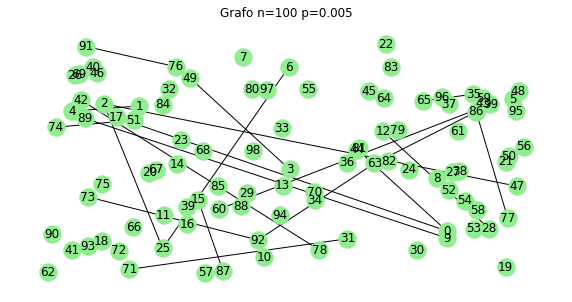

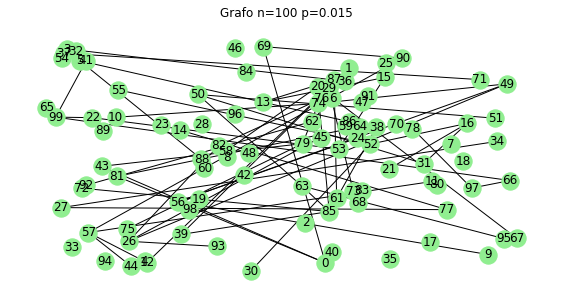

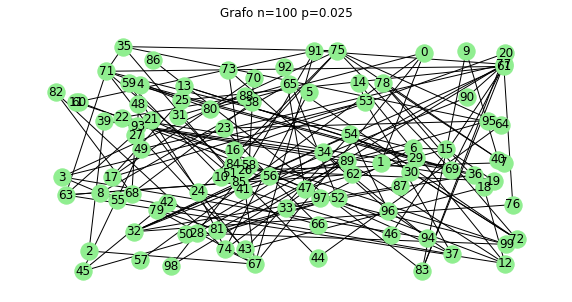

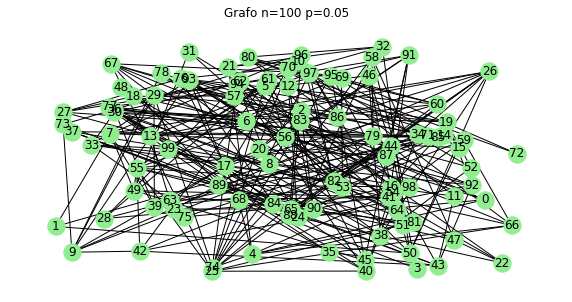

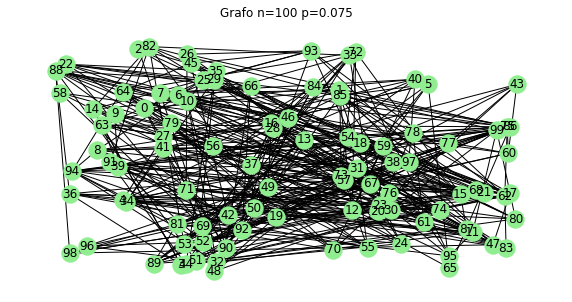

In [46]:
n = 100

modeloG(n, 0.005, True)
modeloG(n, 0.015, True)
modeloG(n, 0.025, True)
modeloG(n, 0.050, True)
modeloG(n, 0.075, True)

# Definir un modelo para los siguentes ejercicios
G = modeloG(n, 0.005, False)

### Calcule el número de componentes conexas en función de  𝑝.


In [4]:
comp = nx.number_connected_components(G)
comp

81

### Calcule el tamaño de la componente conexa más grande en función de 𝑝.

In [5]:
# Obtener la componente conexa más grande
S = G.subgraph(max(nx.connected_components(G), key=len)).copy()

In [6]:
if (nx.is_connected(G)):
    diam = nx.diameter(G)    
else:
    diam = nx.diameter(S)
    
diam

7

### Calcule el camino mínimo promedio de la componente conexa más grande en función de 𝑝.

In [7]:
if (nx.is_connected(G)):
    mmin = nx.average_shortest_path_length(G)
else:
    mmin = nx.average_shortest_path_length(S)
    
mmin

3.0

### Calcule la densidad en función de 𝑝.

In [8]:
dens = nx.density(G)
dens

0.0038383838383838384

### Calcule el coeficiente de clustering promedio en función de  𝑝.

In [9]:
coef = nx.average_clustering(G)
coef

0.0

### Concluya de forma simple y precisa.

Se observa que a mayor probabilidad, mayor es la conexión entre los nodos, por lo tanto se puede llegar a cualquier punto con la teoría de los 6 pasos. Al contrario, cuando hay baja probabilidad se generan más silos y menor comunicacion entre los nodos y los enlaces.

## Grafo real GSA

In [10]:
GSA = pd.read_pickle(r'knn-graph-south-america.p')

n = GSA.number_of_nodes()
m = GSA.number_of_edges()
d = GSA.degree

print (n, m)

var1 = nx.number_connected_components(GSA)
var2 = nx.diameter(GSA)
var3 = nx.average_shortest_path_length(GSA)
var4 = nx.density(GSA)
var5 = nx.average_clustering(GSA)

vars = {
    'connected_components' : var1,
    'diameter' : var2,
    'avg_short_path_len' : var3,
    'density' : var4,
    'avg_clustering' : var5
}

vars


88 365


{'connected_components': 1,
 'diameter': 10,
 'avg_short_path_len': 5.018808777429467,
 'density': 0.09535005224660396,
 'avg_clustering': 0.7277791420434961}

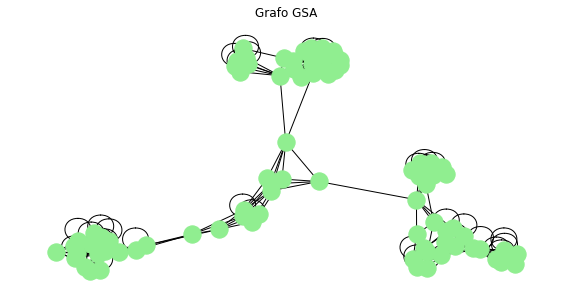

In [44]:
plt.figure(figsize=(10,5))
ax = plt.gca()
ax.set_title(f'Grafo GSA')
nx.draw(GSA, node_color='lightgreen', with_labels=False, ax=ax)

### Construya 100 grafos $G_{n,p}$, con $n$ igual al número de nodos de $G_{SA}$, y distintos valores de $p$.

In [11]:
# Función para comparar si 2 números son equivalentes, dada determinada tolerancia
def equivalent(x1, x2, tolerancia=0.09):
    return math.isclose(x1, x2, rel_tol=tolerancia)

def compare(a, b, n=3):
    return True if (round(a, n) == round(b, n)) else False   

In [12]:
t_ini = datetime.now()

# Utilizar los experimentos previamente calculados
filename = 'experimentos.csv'

if (path.exists(filename)):
    
    df = pd.read_csv(filename, index_col=[0])

else:    
    # Variables temporales
    arr_G = []
    arr_p = []
    arr_comp = []
    arr_diam = []
    avg_short_path = []
    arr_dens = []
    arr_avg_clu = []

    # Experimentos con 100 grafos
    for i in range(100):
        # Experimentos con p desde 0.01 hasta 0.9
        for p in np.arange(0.01, 1, 0.01):
            tmpG = modeloG(n, p)

            #arr_G.append(tmpG)
            arr_p.append(p)
            arr_dens.append(nx.density(tmpG))
            arr_comp.append(nx.number_connected_components(tmpG))
            arr_avg_clu.append(nx.average_clustering(tmpG))

            diam, avg_path = 0, 0

            if (nx.is_connected(tmpG)):
                diam = nx.diameter(tmpG)
                avg_path = nx.average_shortest_path_length(tmpG)

            arr_diam.append(diam)
            avg_short_path.append(avg_path)


    df = pd.concat([
        #pd.DataFrame(arr_G),
        pd.DataFrame(arr_p),
        pd.DataFrame(arr_comp),
        pd.DataFrame(arr_diam),
        pd.DataFrame(avg_short_path),
        pd.DataFrame(arr_dens),
        pd.DataFrame(arr_avg_clu),

    ], axis=1)


    df.columns=['p', 'comp', 'diameter', 'avg_short_path', 'density', 'avg_clustering']

    df.to_csv(filename)

t_end = datetime.now() - t_ini

print (df)
print (f'Duración: { t_end}')

         p  comp  diameter  avg_short_path   density  avg_clustering
0     0.01    45         0        0.000000  0.011494        0.000000
1     0.02    15         0        0.000000  0.020637        0.000000
2     0.03     7         0        0.000000  0.027691        0.000000
3     0.04     2         0        0.000000  0.041014        0.023972
4     0.05     2         0        0.000000  0.047022        0.061517
...    ...   ...       ...             ...       ...             ...
9895  0.95     1         2        1.050679  0.949321        0.949713
9896  0.96     1         2        1.035528  0.964472        0.964238
9897  0.97     1         2        1.029258  0.970742        0.970752
9898  0.98     1         2        1.022727  0.977273        0.977391
9899  0.99     1         2        1.007837  0.992163        0.992186

[9900 rows x 6 columns]
Duración: 0:00:00.010758


### ¿Qué valor de $p$ entrega el grafo aleatorio que más se asemeja a $G_{SA}$? Elija dos medidas de las usadas en la pregunta 1. 

In [13]:
arr_diff_comp = []
arr_diff_diameter = []
arr_diff_short_path = []
arr_diff_density = []
arr_avg_clustering = []

for index, row in df.iterrows():
    p = row['p']
    comp = row['comp']
    diameter = row['diameter']
    avg_short_path = row['avg_short_path']
    density = row['density']
    avg_clustering = row['avg_clustering']
        
    if (compare(vars['density'], density) and compare(vars["connected_components"], comp)):
        print(f'\nwith p = {round(p, 3)}')
        print(f'\tconnected_components:\t{ vars["connected_components"] } ~ { round(comp) }')
        print(f'\tdiameter:\t\t{ vars["diameter"] } ~ { round(diameter) }')
        print(f'\tavg_short_path_len:\t{round(vars["avg_short_path_len"], 8)} ~ { round(avg_short_path, 8) }')
        print(f'\tdensity:\t\t{round(vars["density"], 8)} ~ { round(density, 8) }')
        print(f'\tavg_clustering:\t\t{round(vars["avg_clustering"], 8)} ~ { round(avg_clustering, 8) }')



with p = 0.09
	connected_components:	1 ~ 1
	diameter:		10 ~ 5
	avg_short_path_len:	5.01880878 ~ 2.34796238
	density:		0.09535005 ~ 0.09456635
	avg_clustering:		0.72777914 ~ 0.10077858

with p = 0.1
	connected_components:	1 ~ 1
	diameter:		10 ~ 4
	avg_short_path_len:	5.01880878 ~ 2.33333333
	density:		0.09535005 ~ 0.09482759
	avg_clustering:		0.72777914 ~ 0.0958681

with p = 0.1
	connected_components:	1 ~ 1
	diameter:		10 ~ 4
	avg_short_path_len:	5.01880878 ~ 2.32366771
	density:		0.09535005 ~ 0.09508882
	avg_clustering:		0.72777914 ~ 0.09806667

with p = 0.1
	connected_components:	1 ~ 1
	diameter:		10 ~ 4
	avg_short_path_len:	5.01880878 ~ 2.3322884
	density:		0.09535005 ~ 0.09482759
	avg_clustering:		0.72777914 ~ 0.10269819

with p = 0.09
	connected_components:	1 ~ 1
	diameter:		10 ~ 4
	avg_short_path_len:	5.01880878 ~ 2.31870428
	density:		0.09535005 ~ 0.09456635
	avg_clustering:		0.72777914 ~ 0.085488

with p = 0.1
	connected_components:	1 ~ 1
	diameter:		10 ~ 4
	avg_short_path_len:

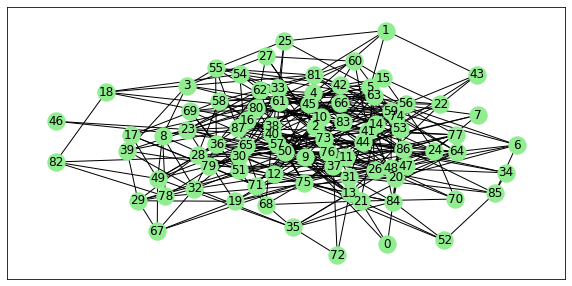

In [49]:
# Generar grafo con el modelo erdos_renyi
G = nx.erdos_renyi_graph(88, 0.09)       

# Graficar
plt.figure(figsize=(10,5))
ax = plt.gca()

nx.draw_networkx(G, node_color='lightgreen', ax=ax)   


Si condideramos el número de componentes conectadas y la densidad, tenemos una semejanza cuando p = 0.09

Si comparamos todos los grafos utilizando todas las medidas, el camino más corto promedio y clustering promedio, se observa que los grafos no muy equivalentes, se necesitan más experimentos para poder concluir de manera diferente.